In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import yoda
yoda.__file__
%pwd

'/sdf/group/ldmx/users/dongyi/data/NLO_5m/Events/run_01'

In [67]:
def plotting(NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_x, DELTA_5m_y, DELTA_xerr, DELTA_yerr, title, plot_path, xlabel, xlim):
    fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[1, 1]}, figsize=(10,6))
    fig.subplots_adjust(hspace=0)

    axs[0].errorbar(NLO_5m_x, NLO_5m_y, marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m_NWF')
    axs[0].errorbar(DELTA_5m_x, DELTA_5m_y, marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m_NWF')
    axs[1].plot(NLO_5m_x,np.ones(len(NLO_5m_x)))
    axs[1].plot(NLO_5m_x,(DELTA_5m_y/NLO_5m_y))

    axs[0].legend()
    axs[0].set_ylabel('NWF')
    axs[1].set_xscale('log')
    axs[1].set_ylabel('DELTA/NLO')
    axs[0].set_title(title)
    axs[1].set_xlabel(xlabel)
    axs[0].set_xlim(min(NLO_5m_x)*.9, max(NLO_5m_x)*1.1)
    axs[1].set_xlim(min(NLO_5m_x)*.9, max(NLO_5m_x)*1.1)
    #axs[1].set_xlim(xlim)

    #fig.savefig(plot_path, bbox_inches='tight', dpi=200)

In [77]:
def setting(NLO_file, DELTA_file, dict):
    NLO=yoda.read(NLO_file)[dict]
    DELTA=yoda.read(DELTA_file)[dict]

    NLO_5m_x=NLO.xVals()
    NLO_5m_y=NLO.yVals()
    DELTA_5m_x=DELTA.xVals()
    DELTA_5m_y=DELTA.yVals()
    NLO_xerr=NLO.xErrs()[:,0]
    NLO_yerr=NLO.yErrs()[:,0]
    DELTA_xerr=DELTA.xErrs()[:,0]
    DELTA_yerr=DELTA.yErrs()[:,0]

    return NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_x, DELTA_5m_y, DELTA_xerr, DELTA_yerr

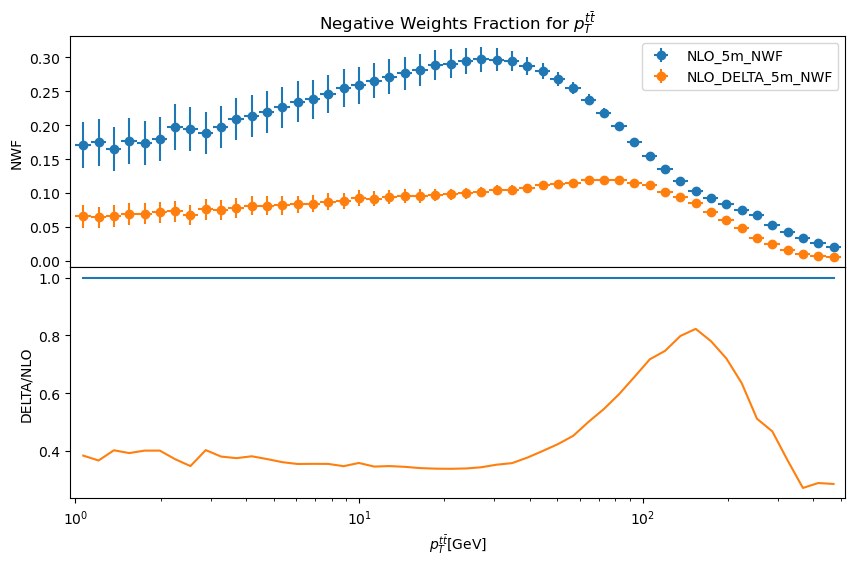

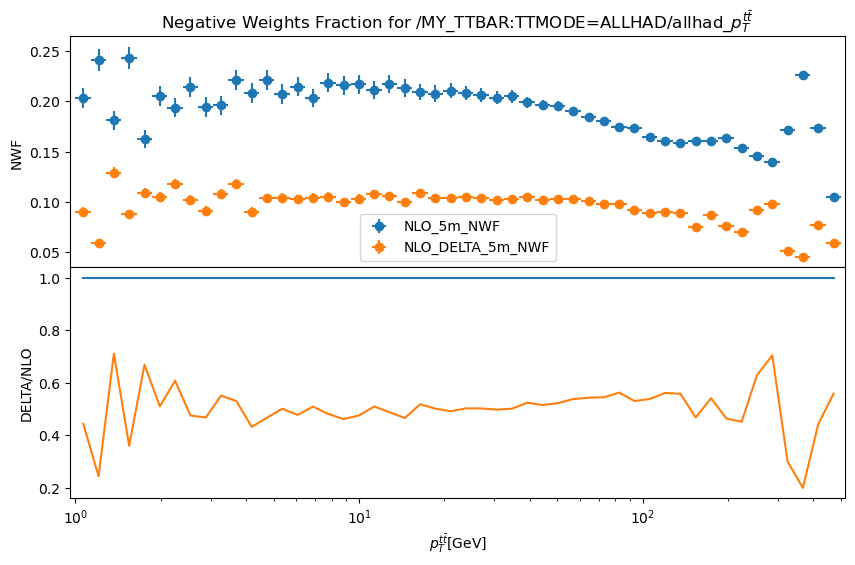

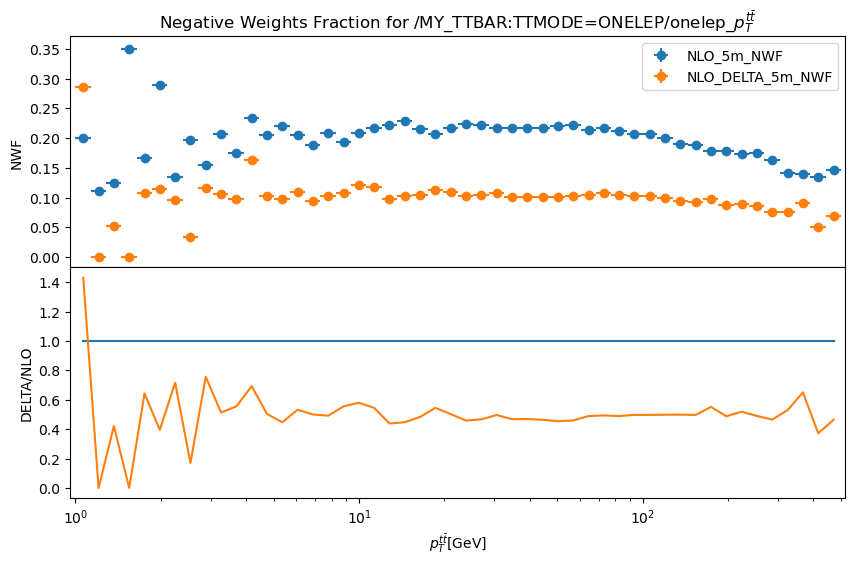

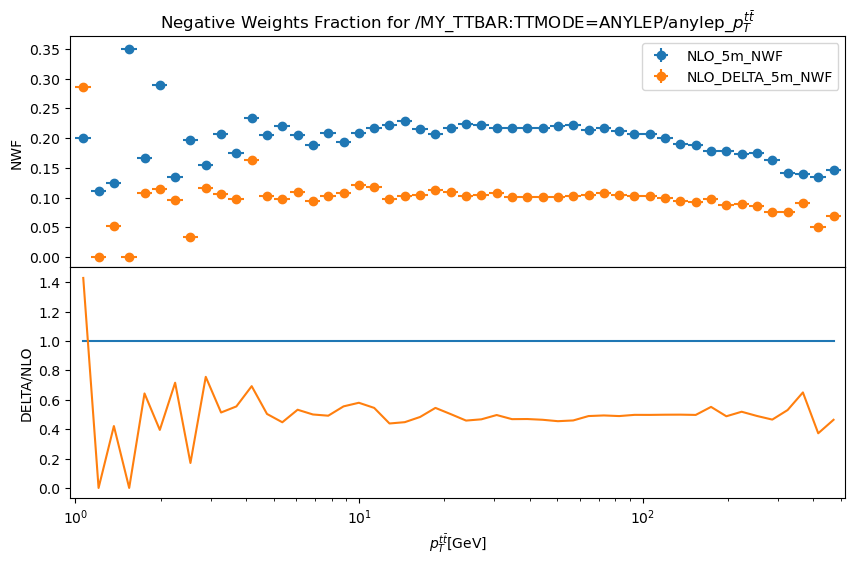

In [76]:
root_path = '/sdf/group/ldmx/users/dongyi/data/'
Event = '/Events/run_01/'
MC_TTBAR = ['/MY_TTBAR:TTMODE=ALLHAD/allhad_', '/MY_TTBAR:TTMODE=ONELEP/onelep_', '/MY_TTBAR:TTMODE=ANYLEP/anylep_']
kine = ['HT', 'M_TTBAR', 'pT_TTBAR']
x_lim = [[50, 2500], [350, 1000], [1, 500]]

plot_title = [r'$H_T$', r'$m_{t\bar{t}}$', r'$p_T^{t\bar{t}}$']


NLO_file = root_path + 'NLO_5m' + Event + 'NLO_5m_' + 'NWF_TTBAR_combined' + '_fractionalized.yoda'
DELTA_file = root_path + 'NLO_DELTA_5m' + Event + 'NLO_DELTA_5m_' + 'NWF_TTBAR_combined' + '_fractionalized.yoda'

# For MY_NWF only
for j in range(2,3):
    dict = '/MY_NWF/' + kine[j] + 'nwf'
    title = 'Negative Weights Fraction for ' + plot_title[j]
    plot_path='/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/NWF/' + 'NWF_' + kine[j]
    xlabel= plot_title[j] + '[GeV]'
    
    NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_x, DELTA_5m_y, DELTA_xerr, DELTA_yerr = setting(NLO_file, DELTA_file, dict)
    plotting(NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_x, DELTA_5m_y, DELTA_xerr, DELTA_yerr, title, plot_path, xlabel, x_lim[j])

# For MC_TTBAR
for i in range(len(MC_TTBAR)):
    dict = MC_TTBAR[i] + kine[2] + 'nwf'
    title = 'Negative Weights Fraction for ' + MC_TTBAR[i] + plot_title[2]
    plot_path='/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/NWF/' + 'NWF_' + kine[j]
    xlabel= plot_title[j] + '[GeV]'
    
    NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_x, DELTA_5m_y, DELTA_xerr, DELTA_yerr = setting(NLO_file, DELTA_file, dict)
    plotting(NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_x, DELTA_5m_y, DELTA_xerr, DELTA_yerr, title, plot_path, xlabel, x_lim[j])


In [59]:
data1 = yoda.read("/sdf/group/ldmx/users/dongyi/data/NLO_5m/Events/run_01/NLO_5m_NWF_TTBAR_combined_fractionalized.yoda")
data2 = yoda.read("/sdf/group/ldmx/users/dongyi/data/NLO_DELTA_5m/Events/run_01/NLO_DELTA_5m_NWF_TTBAR_combined_fractionalized.yoda")
print(data1)


OrderedDict([('/MY_NWF/HTnwf', <Scatter2D '/MY_NWF/HTnwf' 100 points>), ('/MY_NWF/M_TTBARnwf', <Scatter2D '/MY_NWF/M_TTBARnwf' 50 points>), ('/MY_NWF/pT_TTBARnwf', <Scatter2D '/MY_NWF/pT_TTBARnwf' 50 points>), ('/MY_TTBAR:TTMODE=ALLHAD/allhad_HTnwf', <Scatter2D '/MY_TTBAR:TTMODE=ALLHAD/allhad_HTnwf' 50 points>), ('/MY_TTBAR:TTMODE=ALLHAD/allhad_M_TTBARnwf', <Scatter2D '/MY_TTBAR:TTMODE=ALLHAD/allhad_M_TTBARnwf' 150 points>), ('/MY_TTBAR:TTMODE=ALLHAD/allhad_pT_TTBARnwf', <Scatter2D '/MY_TTBAR:TTMODE=ALLHAD/allhad_pT_TTBARnwf' 50 points>), ('/MY_TTBAR:TTMODE=ANYLEP/anylep_HTnwf', <Scatter2D '/MY_TTBAR:TTMODE=ANYLEP/anylep_HTnwf' 50 points>), ('/MY_TTBAR:TTMODE=ANYLEP/anylep_pT_TTBARnwf', <Scatter2D '/MY_TTBAR:TTMODE=ANYLEP/anylep_pT_TTBARnwf' 50 points>), ('/MY_TTBAR:TTMODE=ONELEP/onelep_HTnwf', <Scatter2D '/MY_TTBAR:TTMODE=ONELEP/onelep_HTnwf' 50 points>), ('/MY_TTBAR:TTMODE=ONELEP/onelep_M_TTBARnwf', <Scatter2D '/MY_TTBAR:TTMODE=ONELEP/onelep_M_TTBARnwf' 150 points>), ('/MY_TTBAR:TTMO

In [60]:
s1 = data1['/MY_NWF/HTnwf']
s2 = data2['/MY_NWF/HTnwf']
NLO_xerr=s1.xErrs()[:,0]
NLO_yerr=s1.yErrs()
print(NLO_xerr)

[ 0.283835  0.29995   0.31698   0.33497   0.353985  0.37408   0.39532
  0.417755  0.441475  0.466535  0.493015  0.521005  0.550585  0.581835
  0.614865  0.64977   0.68666   0.725635  0.766825  0.81036   0.85636
  0.904975  0.95635   1.010635  1.06801   1.128635  1.192705  1.26041
  1.331965  1.407575  1.48748   1.57192   1.66115   1.755455  1.855105
  1.960415  2.0717    2.189305  2.31359   2.444925  2.583715  2.73038
  2.8854    3.04915   3.2223    3.4052    3.5985    3.80275   4.01865
  4.2468    4.48785   4.7426    5.01185   5.29635   5.59705   5.91475
  6.2505    6.6053    6.9803    7.37655   7.7953    8.23785   8.70545
  9.19965   9.7219   10.27375  10.857    11.4733   12.1246   12.8129
 13.54025  14.3089   15.1212   15.97955  16.8867   17.8453   18.85835
 19.92885  21.0602   22.2557   23.5191   24.85425  26.26515  27.75625
 29.3315   30.997    32.7565   34.616    36.581    38.6575   40.8525
 43.171    45.622    48.212    50.9485   53.8405   56.8975   60.127
 63.5405   67.1475  ]


/tmp/ipykernel_65245/2806518738.py:18: RuntimeWarning: invalid value encountered in divide
  axs[1].plot(NLO_5m_x,(DELTA_5m_y/NLO_5m_y))


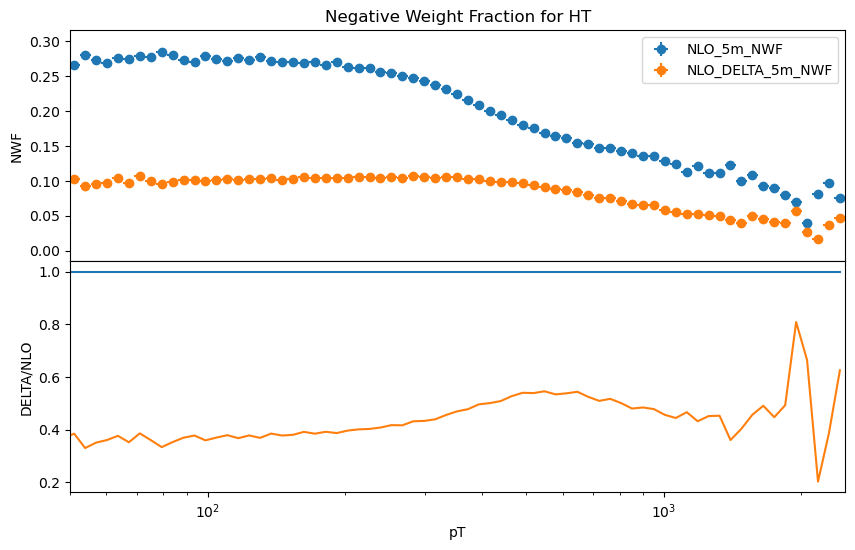

In [62]:
NLO_5m_x=s1.xVals()
NLO_5m_y=s1.yVals()
DELTA_5m_x=s2.xVals()
DELTA_5m_y=s2.yVals()
NLO_xerr=s1.xErrs()[:,0]
NLO_yerr=s1.yErrs()[:,0]
DELTA_xerr=s2.xErrs()[:,0]
DELTA_yerr=s2.yErrs()[:,0]



fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[1, 1]}, figsize=(10,6))
fig.subplots_adjust(hspace=0)

axs[0].errorbar(NLO_5m_x, NLO_5m_y, marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m_NWF')
axs[0].errorbar(DELTA_5m_x, DELTA_5m_y, marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m_NWF')
axs[1].plot(NLO_5m_x,np.ones(len(NLO_5m_x)))
axs[1].plot(NLO_5m_x,(DELTA_5m_y/NLO_5m_y))

axs[0].legend()
axs[0].set_ylabel('NWF')
axs[1].set_xscale('log')
axs[1].set_ylabel('DELTA/NLO')
axs[0].set_title('Negative Weight Fraction for HT')
axs[1].set_xlabel('pT')
axs[1].set_xlim([50,2500])

plot_path='/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//python-plots/NWF/' + 'NWF_HT'
#fig.savefig(plot_path, bbox_inches='tight', dpi=200)

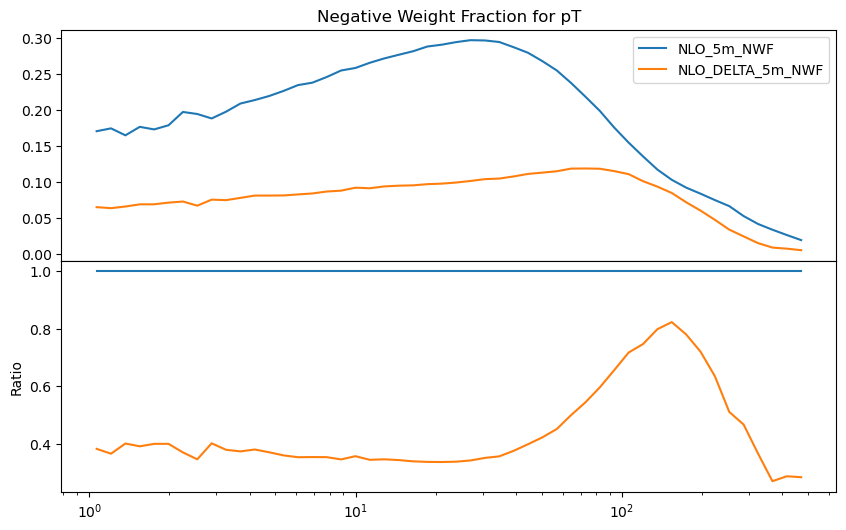

In [5]:
s1 = data1['/MY_NWF/pT_TTBARnwf']
s2 = data2['/MY_NWF/pT_TTBARnwf']

N=50
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.subplots_adjust(hspace=0)

x1 = np.zeros(N)
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)
for i in range(N):
    p1 = s1.point(i)
    x1[i] = p1.x()
    y1[i] = p1.y()
    p2 = s2.point(i)
    x2[i] = p2.x()
    y2[i] = p2.y()
ax1.plot(x1, y1, '-', label='NLO_5m_NWF')
ax1.plot(x2, y2, '-', label='NLO_DELTA_5m_NWF')
ax2.plot(x1,y1/y1, label='DELTA/5m')
ax2.plot(x1,y2/y1, label='DELTA/5m')
ax1.set_title('Negative Weight Fraction for pT')


ax1.legend()
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_ylabel('Ratio')
plot_path='/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//python-plots/NWF/' + 'NWF_pT'
fig.savefig(plot_path, bbox_inches='tight', dpi=200)

/tmp/ipykernel_47085/2365481674.py:23: RuntimeWarning: invalid value encountered in divide
  ax2.plot(x1,y1/y1, label='DELTA/5m')
/tmp/ipykernel_47085/2365481674.py:24: RuntimeWarning: invalid value encountered in divide
  ax2.plot(x1,y2/y1, label='DELTA/5m')


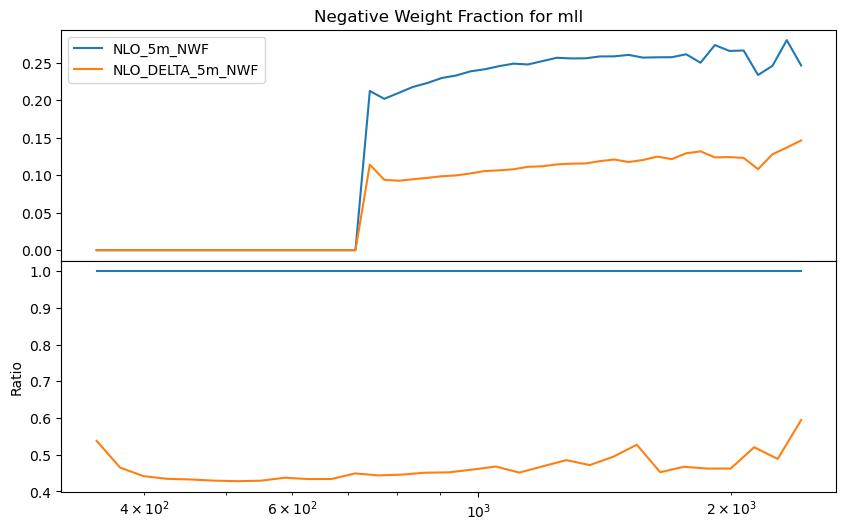

In [6]:
s1 = data1['/MY_NWF/mllnwf']
s2 = data2['/MY_NWF/mllnwf']

N=50
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.subplots_adjust(hspace=0)

x1 = np.zeros(N)
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)
for i in range(N):
    p1 = s1.point(i)
    x1[i] = p1.x()
    y1[i] = p1.y()
    p2 = s2.point(i)
    x2[i] = p2.x()
    y2[i] = p2.y()
ax1.plot(x1, y1, '-', label='NLO_5m_NWF')
ax1.plot(x2, y2, '-', label='NLO_DELTA_5m_NWF')
ax2.plot(x1,y1/y1, label='DELTA/5m')
ax2.plot(x1,y2/y1, label='DELTA/5m')
ax1.set_title('Negative Weight Fraction for mll')



ax1.legend()
ax1.set_xscale('log')

ax2.set_xscale('log')
ax2.set_ylabel('Ratio')

plot_path='/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//python-plots/NWF/' + 'NWF_mll'
fig.savefig(plot_path, bbox_inches='tight', dpi=200)